In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import sqlite3 as sql
import datetime
from pathlib import Path

In [2]:
file ='AI_Powered_Eduction_system'
def root(root_name:str=file):
    for parent in Path().resolve().parents:
        if parent.name == root_name:
            return(parent) 
ROOT = root()

In [3]:
#LOG
#These columns are renamed for ease of use 'ITEST_id': 'student_ID','SY ASSISTments Usage':'year'
#'student_ID','year','skill','problemId','timeTaken','correct','hintCount','attemptCount','problemType' are the only columns kept other columns are removed.
#'attemptCount','hintCount','timeTaken' outliers removed.
#'timeTaken' log transform done


In [4]:
#Loading Data
s1 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_1.csv')
s2 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_2.csv')
s3 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_3.csv')
s4 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_4.csv')
s5 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_5.csv')
s6 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_6.csv')
s7 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_7.csv')
s8 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_8.csv')
s9 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_9.csv')
s10 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_10.csv')

C:\Users\Udith\AppData\Local\Temp\ipykernel_19488\2921532910.py:3: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  s2 = pd.read_csv(ROOT/r'data\Train_datasets\Pass_Fail\student_log_2.csv')


In [5]:
#Viewing Data
s1.head()

,ITEST_id,SY ASSISTments Usage,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,AveResConf,AveResFrust,...,confidence(OFF TASK),confidence(GAMING),RES_BORED,RES_CONCENTRATING,RES_CONFUSED,RES_FRUSTRATED,RES_OFFTASK,RES_GAMING,Ln-1,Ln
0,8,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,...,0.838710,0.008522,0.376427,0.320317,0.000000,0.0,0.785585,0.000264,0.130000,0.061190
1,8,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,...,0.600000,0.047821,0.156027,0.995053,0.887452,0.0,0.468252,0.001483,0.061190,0.213510
2,8,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,...,0.600000,0.047821,0.156027,0.995053,0.887452,0.0,0.468252,0.001483,0.116000,0.033306
3,8,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,...,0.204082,0.343996,0.156027,0.744520,0.000000,0.0,0.108417,0.010665,0.116000,0.033306
4,8,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,0.115905,0.112408,...,0.204082,0.343996,0.156027,0.744520,0.000000,0.0,0.108417,0.010665,0.033306,0.118386


In [6]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231403 entries, 0 to 231402
Data columns (total 76 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ITEST_id                                231403 non-null  int64  
 1   SY ASSISTments Usage                    231403 non-null  object 
 2   AveKnow                                 231403 non-null  float64
 3   AveCarelessness                         231403 non-null  float64
 4   AveCorrect                              231403 non-null  float64
 5   NumActions                              231403 non-null  int64  
 6   AveResBored                             231403 non-null  float64
 7   AveResEngcon                            231403 non-null  float64
 8   AveResConf                              231403 non-null  float64
 9   AveResFrust                             231403 non-null  float64
 10  AveResOfftask                           2314

In [7]:
#Function to clean data
def clean_data(dataframes):
    list=[]
    for df in dataframes:
        df = df.rename(columns={'ITEST_id': 'student_ID','SY ASSISTments Usage':'year'})
        cols_to_keep = ['student_ID','year','skill','problemId','timeTaken','correct','hintCount','attemptCount','problemType']
        df = df[cols_to_keep]
        df[['year1','year2']] = df['year'].str.split('-',expand=True)
        df['year1']=pd.to_datetime(df['year1'])
        df['year1']=df['year1'].dt.year
        df['year2']=pd.to_datetime(df['year2'])
        df['year2']=df['year2'].dt.year
        df=df.drop(columns=['year','problemId'],axis=1)
        list.append(df)
    result=pd.concat(list,axis=0,ignore_index=True)
    return result
        


In [8]:
#Cleaning and merging data into 1
dataframes = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]
student_log = clean_data(dataframes)

In [9]:
#Viewing cleaned data
student_log.head(10)

,student_ID,skill,timeTaken,correct,hintCount,attemptCount,problemType,year1,year2
0,8,properties-of-geometric-figures,49.0,0,1,1,textfieldquestion,2004,2005
1,8,properties-of-geometric-figures,4.0,1,0,1,noprobtype,2004,2005
2,8,sum-of-interior-angles-more-than-3-sides,6.0,0,0,1,noprobtype,2004,2005
3,8,sum-of-interior-angles-more-than-3-sides,18.0,0,0,2,noprobtype,2004,2005
4,8,sum-of-interior-angles-more-than-3-sides,2.0,1,0,1,noprobtype,2004,2005
5,8,sum-of-interior-angles-more-than-3-sides,59.0,0,1,2,noprobtype,2004,2005
6,8,sum-of-interior-angles-more-than-3-sides,15.0,1,1,3,noprobtype,2004,2005
7,8,point-plotting,61.0,0,0,1,radioquestion,2004,2005
8,8,transformations-rotations,18.0,0,0,1,noprobtype,2004,2005
9,8,transformations-rotations,0.0,0,0,2,noprobtype,2004,2005


In [10]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942816 entries, 0 to 942815
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_ID    942816 non-null  int64  
 1   skill         942816 non-null  object 
 2   timeTaken     942816 non-null  float64
 3   correct       942816 non-null  int64  
 4   hintCount     942816 non-null  int64  
 5   attemptCount  942816 non-null  int64  
 6   problemType   942816 non-null  object 
 7   year1         942816 non-null  int32  
 8   year2         942816 non-null  int32  
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 57.5+ MB


In [11]:
#Encoding object data
le = LabelEncoder()
student_log['skill_ID'] = le.fit_transform(student_log['skill'])
le1 = LabelEncoder()
student_log['Type_ID'] = le1.fit_transform(student_log['problemType'])
sl_skill = student_log[['skill_ID','skill']].drop_duplicates().reset_index(drop=True)
sl_problemType = student_log[['Type_ID','problemType']].drop_duplicates().reset_index(drop=True)

In [12]:
student_log = student_log.drop(columns=['skill','problemType'],axis=0)

<Axes: xlabel='attemptCount'>

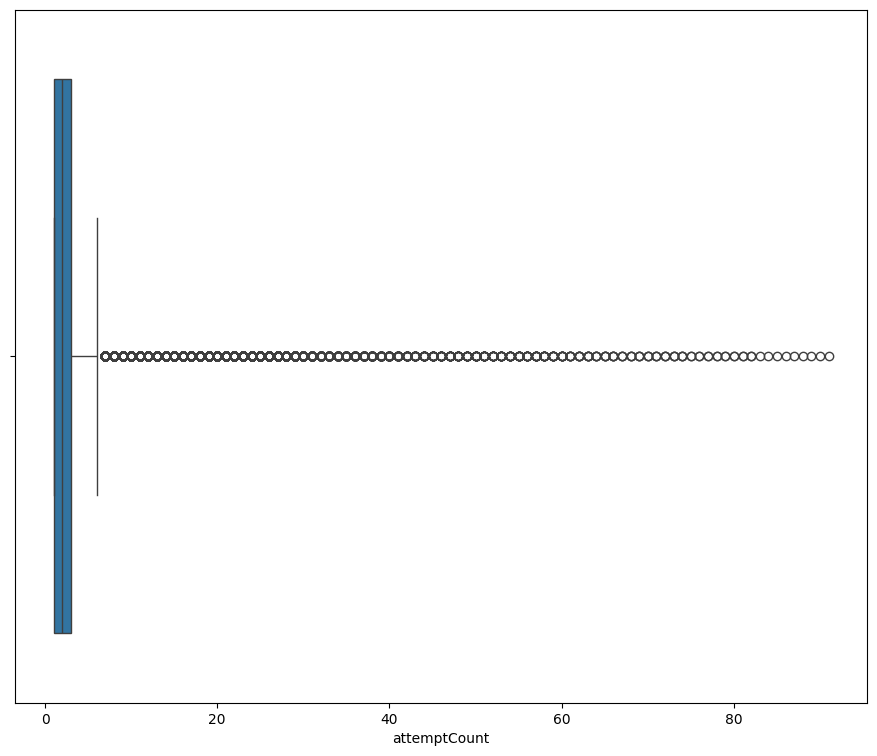

In [13]:
#EDA
#Box plot to check outliers
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(data=student_log,x='attemptCount')

In [14]:
#Treating outliers
q1=np.percentile(student_log['attemptCount'],25)
q3=np.percentile(student_log['attemptCount'],75)
IQR = q3-q1
upperfence=q3+(1.5*IQR)
lowerfence=q1-(1.5*IQR)
print('Number of outliers:',sum((student_log['attemptCount']>=upperfence)|(student_log['attemptCount']<=lowerfence)))
print('Total number of data:',len(student_log['attemptCount']))
print('percentage of ouliers:',(sum((student_log['attemptCount']>=upperfence)|(student_log['attemptCount']<=lowerfence)))/(len(student_log['attemptCount']))*100)

Number of outliers: 86383
Total number of data: 942816
percentage of ouliers: 9.162233139870345


In [15]:
#removing outliers
student_log=student_log[(student_log['attemptCount']<=upperfence)&(student_log['attemptCount']>=lowerfence)]

In [16]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883006 entries, 0 to 942815
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_ID    883006 non-null  int64  
 1   timeTaken     883006 non-null  float64
 2   correct       883006 non-null  int64  
 3   hintCount     883006 non-null  int64  
 4   attemptCount  883006 non-null  int64  
 5   year1         883006 non-null  int32  
 6   year2         883006 non-null  int32  
 7   skill_ID      883006 non-null  int32  
 8   Type_ID       883006 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 53.9 MB


In [17]:
student_log.describe().round(2)

,student_ID,timeTaken,correct,hintCount,attemptCount,year1,year2,skill_ID,Type_ID
count,883006.00,883006.00,883006.00,883006.00,883006.00,883006.00,883006.00,883006.00,883006.00
mean,3848.54,30.20,0.38,0.93,2.12,2004.43,2005.43,57.05,10.65
std,2250.92,71.65,0.49,1.28,1.39,0.50,0.50,24.98,5.11
min,8.00,0.00,0.00,0.00,1.00,2004.00,2005.00,0.00,0.00
25%,1960.00,5.00,0.00,0.00,1.00,2004.00,2005.00,39.00,10.00
50%,3768.00,12.00,0.00,0.00,2.00,2004.00,2005.00,59.00,13.00
75%,5785.00,31.00,1.00,2.00,3.00,2005.00,2006.00,72.00,15.00
max,7783.00,9999.00,1.00,38.00,6.00,2005.00,2006.00,101.00,15.00


<Axes: xlabel='attemptCount'>

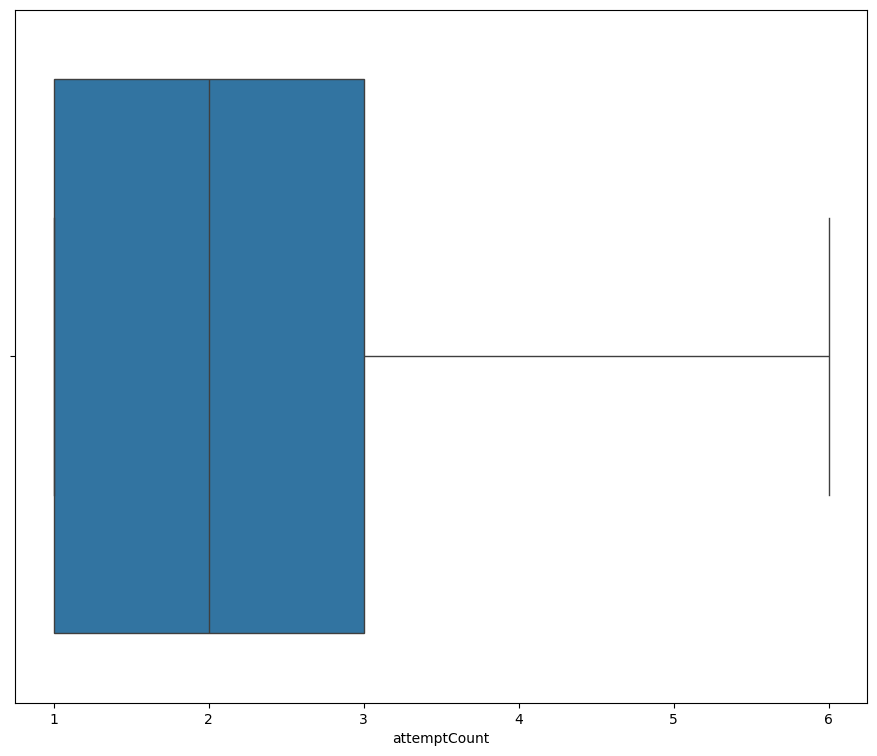

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(data=student_log,x='attemptCount')

In [19]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883006 entries, 0 to 942815
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_ID    883006 non-null  int64  
 1   timeTaken     883006 non-null  float64
 2   correct       883006 non-null  int64  
 3   hintCount     883006 non-null  int64  
 4   attemptCount  883006 non-null  int64  
 5   year1         883006 non-null  int32  
 6   year2         883006 non-null  int32  
 7   skill_ID      883006 non-null  int32  
 8   Type_ID       883006 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 53.9 MB


<Axes: xlabel='hintCount'>

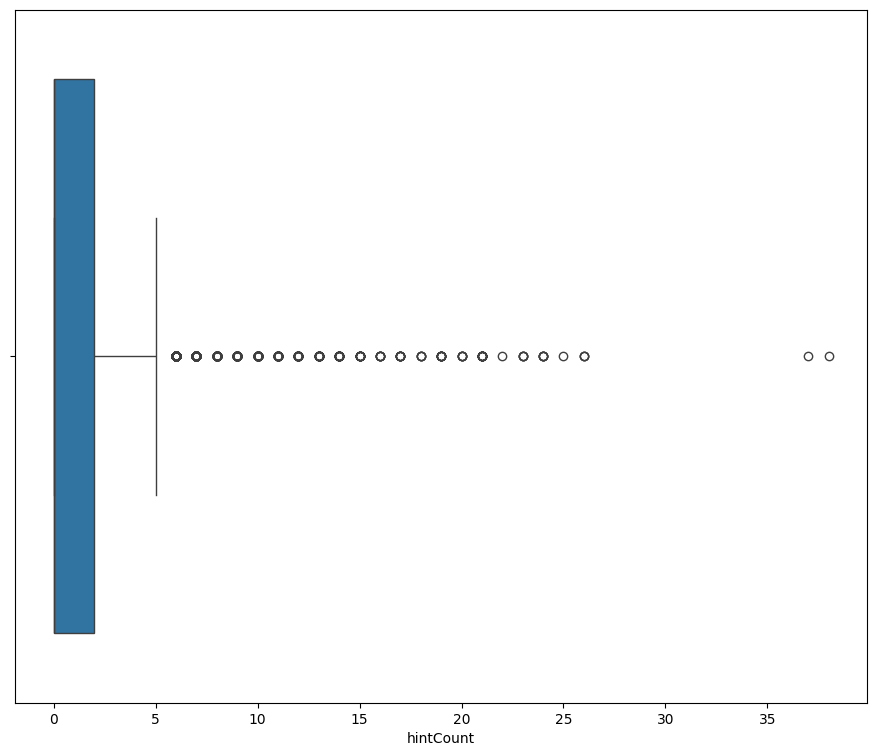

In [20]:
f1, ax1 = plt.subplots(figsize=(11, 9))
sns.boxplot(data=student_log,x='hintCount')

In [21]:
q1=np.percentile(student_log['hintCount'],25)
q3=np.percentile(student_log['hintCount'],75)
IQR = q3-q1
upperfence1=q3+(1.5*IQR)
lowerfence1=q1-(1.5*IQR)
print('Number of outliers:',sum((student_log['hintCount']>=upperfence)|(student_log['hintCount']<=lowerfence)))
print('Total number of data:',len(student_log['hintCount']))
print('percentage of ouliers:',(sum((student_log['hintCount']>=upperfence)|(student_log['hintCount']<=lowerfence)))/(len(student_log['hintCount']))*100)

Number of outliers: 1962
Total number of data: 883006
percentage of ouliers: 0.22219554567013133


In [22]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883006 entries, 0 to 942815
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_ID    883006 non-null  int64  
 1   timeTaken     883006 non-null  float64
 2   correct       883006 non-null  int64  
 3   hintCount     883006 non-null  int64  
 4   attemptCount  883006 non-null  int64  
 5   year1         883006 non-null  int32  
 6   year2         883006 non-null  int32  
 7   skill_ID      883006 non-null  int32  
 8   Type_ID       883006 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 53.9 MB


In [23]:
student_log=student_log[(student_log['hintCount']<=upperfence1)&(student_log['hintCount']>=lowerfence1)]


In [24]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881044 entries, 0 to 942815
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_ID    881044 non-null  int64  
 1   timeTaken     881044 non-null  float64
 2   correct       881044 non-null  int64  
 3   hintCount     881044 non-null  int64  
 4   attemptCount  881044 non-null  int64  
 5   year1         881044 non-null  int32  
 6   year2         881044 non-null  int32  
 7   skill_ID      881044 non-null  int32  
 8   Type_ID       881044 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 53.8 MB


In [25]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881044 entries, 0 to 942815
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_ID    881044 non-null  int64  
 1   timeTaken     881044 non-null  float64
 2   correct       881044 non-null  int64  
 3   hintCount     881044 non-null  int64  
 4   attemptCount  881044 non-null  int64  
 5   year1         881044 non-null  int32  
 6   year2         881044 non-null  int32  
 7   skill_ID      881044 non-null  int32  
 8   Type_ID       881044 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 53.8 MB


<Axes: xlabel='hintCount'>

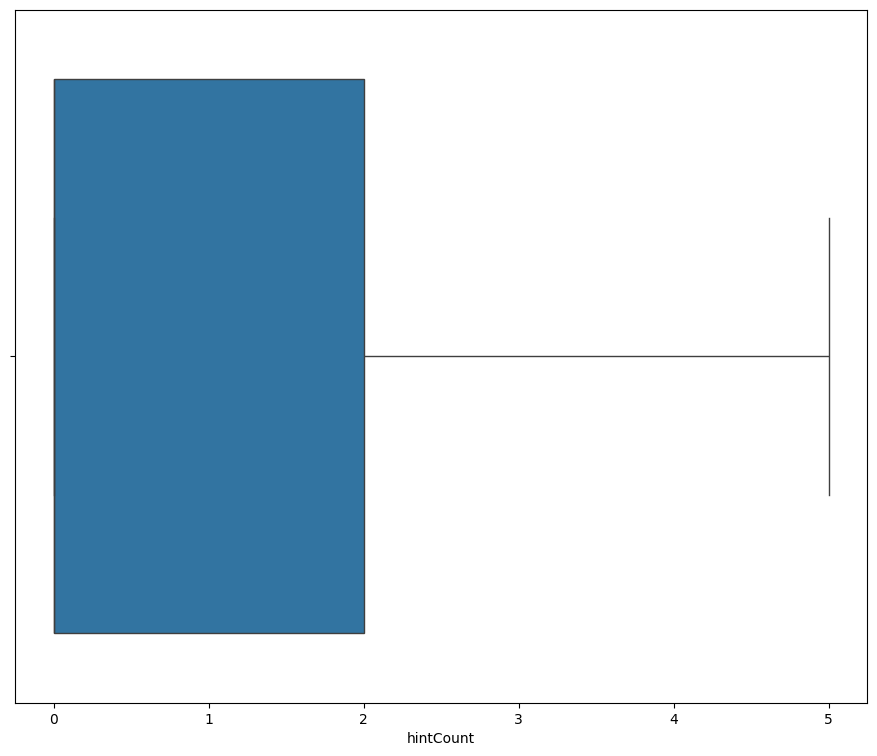

In [26]:
f1, ax1 = plt.subplots(figsize=(11, 9))
sns.boxplot(data=student_log,x='hintCount')

<Axes: xlabel='timeTaken'>

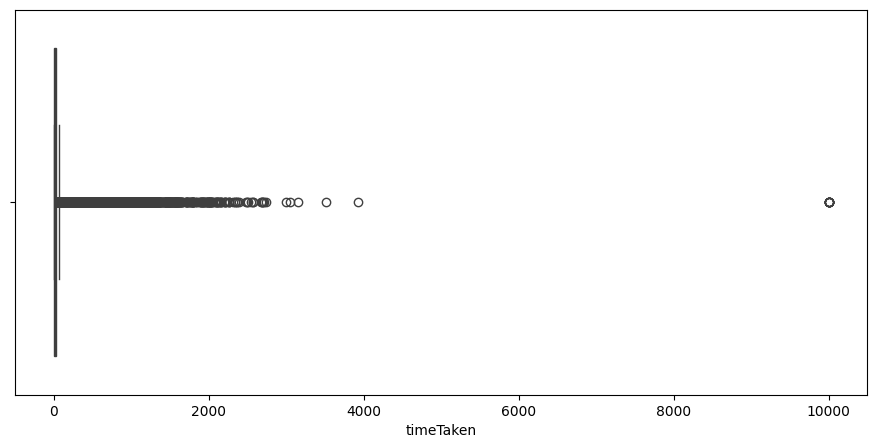

In [27]:
f2, ax2 = plt.subplots(figsize=(11, 5))
sns.boxplot(data=student_log,x='timeTaken')

In [28]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881044 entries, 0 to 942815
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_ID    881044 non-null  int64  
 1   timeTaken     881044 non-null  float64
 2   correct       881044 non-null  int64  
 3   hintCount     881044 non-null  int64  
 4   attemptCount  881044 non-null  int64  
 5   year1         881044 non-null  int32  
 6   year2         881044 non-null  int32  
 7   skill_ID      881044 non-null  int32  
 8   Type_ID       881044 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 53.8 MB


In [29]:
print(student_log[student_log['timeTaken']>8000])

        student_ID  timeTaken  correct  hintCount  attemptCount  year1  year2  \
196576         203     9999.0        0          1             1   2005   2006   
600295         690     9999.0        0          0             1   2005   2006   
624809        1826     9999.0        0          0             1   2005   2006   
720951        3609     9999.0        0          0             1   2005   2006   
731180        3837     9999.0        1          0             1   2005   2006   
788196        4970     9999.0        0          0             1   2005   2006   
814419        5400     9999.0        1          0             1   2005   2006   
866870        1231     9999.0        1          0             1   2005   2006   
939171        7730     9999.0        1          0             1   2005   2006   

        skill_ID  Type_ID  
196576        74       14  
600295        62       15  
624809        29       14  
720951         3       14  
731180        21       15  
788196        24     

In [30]:
student_log=student_log[student_log['timeTaken']<8000]

In [31]:
q1=np.percentile(student_log['timeTaken'],25)
q3=np.percentile(student_log['timeTaken'],75)
IQR = q3-q1
upperfence2=q3+(1.5*IQR)
lowerfence2=q1-(1.5*IQR)
print('Number of outliers:',sum((student_log['timeTaken']>=upperfence)|(student_log['timeTaken']<=lowerfence)))
print('Total number of data:',len(student_log['timeTaken']))
print('percentage of ouliers:',(sum((student_log['timeTaken']>=upperfence)|(student_log['timeTaken']<=lowerfence)))/(len(student_log['timeTaken']))*100)

Number of outliers: 615140
Total number of data: 881035
percentage of ouliers: 69.82015470441016


In [32]:
student_log['timeTaken']=(student_log['timeTaken']+1).transform('log')

In [33]:
student_log.describe().round(2)

,student_ID,timeTaken,correct,hintCount,attemptCount,year1,year2,skill_ID,Type_ID
count,881035.00,881035.00,881035.00,881035.00,881035.00,881035.00,881035.00,881035.00,881035.00
mean,3848.84,2.64,0.38,0.92,2.12,2004.43,2005.43,57.06,10.65
std,2251.09,1.20,0.49,1.24,1.39,0.50,0.50,24.98,5.11
min,8.00,0.00,0.00,0.00,1.00,2004.00,2005.00,0.00,0.00
25%,1960.00,1.79,0.00,0.00,1.00,2004.00,2005.00,39.00,10.00
50%,3768.00,2.56,0.00,0.00,2.00,2004.00,2005.00,59.00,13.00
75%,5785.00,3.47,1.00,2.00,3.00,2005.00,2006.00,72.00,15.00
max,7783.00,8.28,1.00,5.00,6.00,2005.00,2006.00,101.00,15.00


<Axes: xlabel='timeTaken'>

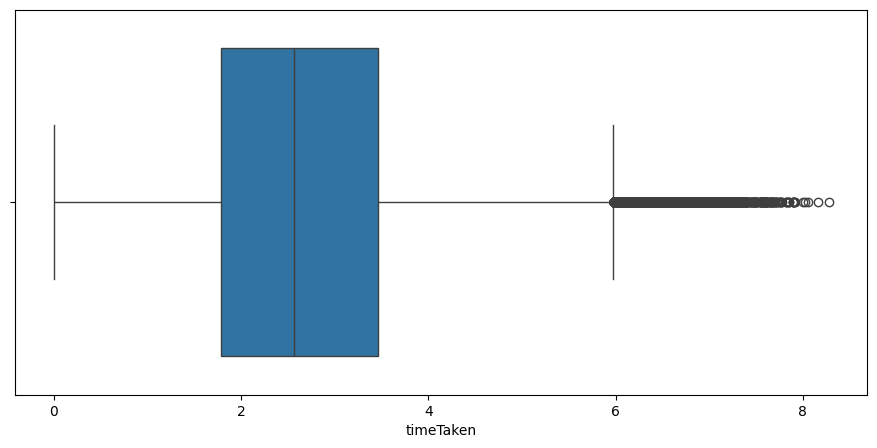

In [34]:
f2, ax2 = plt.subplots(figsize=(11, 5))
sns.boxplot(data=student_log,x='timeTaken')

In [35]:
q1=np.percentile(student_log['timeTaken'],25)
q3=np.percentile(student_log['timeTaken'],75)
IQR = q3-q1
upperfence2=q3+(1.5*IQR)
lowerfence2=q1-(1.5*IQR)
print('Number of outliers:',sum((student_log['timeTaken']>=upperfence)|(student_log['timeTaken']<=lowerfence)))
print('Total number of data:',len(student_log['timeTaken']))
print('percentage of ouliers:',(sum((student_log['timeTaken']>=upperfence)|(student_log['timeTaken']<=lowerfence)))/(len(student_log['timeTaken']))*100)

Number of outliers: 3877
Total number of data: 881035
percentage of ouliers: 0.4400506222794781


<Axes: xlabel='timeTaken'>

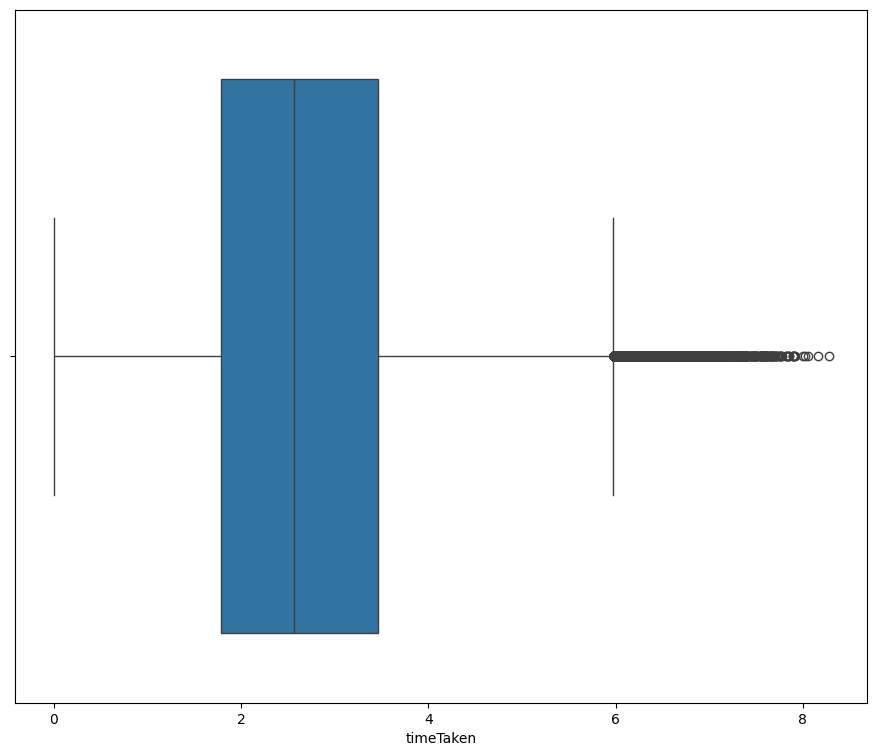

In [36]:
f2, ax2 = plt.subplots(figsize=(11, 9))
sns.boxplot(data=student_log,x='timeTaken')

<Axes: xlabel='count', ylabel='Type_ID'>

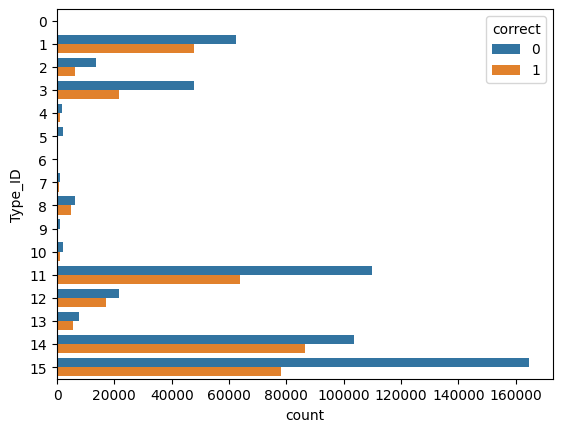

In [37]:
sns.countplot(data=student_log,y='Type_ID',hue='correct')

<Axes: >

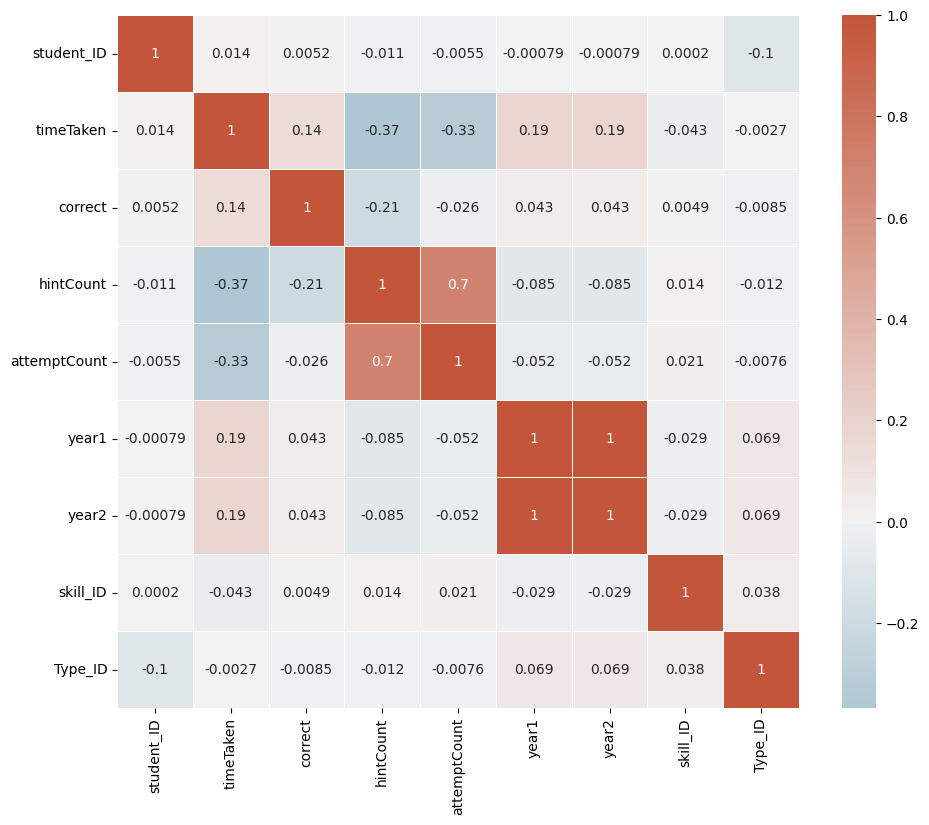

In [38]:
#Checking correlation
corr_mat = student_log.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_mat,linewidths=0.5,linecolor='white',cmap=cmap,center=0,annot=True)

In [39]:
student_log.reset_index(inplace=True)

In [40]:
student_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881035 entries, 0 to 881034
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         881035 non-null  int64  
 1   student_ID    881035 non-null  int64  
 2   timeTaken     881035 non-null  float64
 3   correct       881035 non-null  int64  
 4   hintCount     881035 non-null  int64  
 5   attemptCount  881035 non-null  int64  
 6   year1         881035 non-null  int32  
 7   year2         881035 non-null  int32  
 8   skill_ID      881035 non-null  int32  
 9   Type_ID       881035 non-null  int32  
dtypes: float64(1), int32(4), int64(5)
memory usage: 53.8 MB


In [41]:
student_log.head()

,index,student_ID,timeTaken,correct,hintCount,attemptCount,year1,year2,skill_ID,Type_ID
0,0,8,3.912023,0,1,1,2004,2005,72,15
1,1,8,1.609438,1,0,1,2004,2005,72,11
2,2,8,1.945910,0,0,1,2004,2005,92,11
3,3,8,2.944439,0,0,2,2004,2005,92,11
4,4,8,1.098612,1,0,1,2004,2005,92,11


In [42]:
#Connecting to SQL
con = sql.connect(ROOT/r'data\Train_datasets\Pass_Fail\AI_Edu_system.db')
cur = con.cursor()

In [43]:
def add_data(df,table):
    cols = tuple(df.columns)
    for index,row in df.iterrows():
        cur.execute(f''' INSERT INTO {table}{cols}
                     VALUES {tuple(row)}''')

In [44]:
#clearing the data base
tables = ['skills','problemtype','student_log']
for i in tables:
    cur.execute(f'''DROP TABLE IF EXISTS {i}''')

In [45]:
sl_skill.head()

,skill_ID,skill
0,72,properties-of-geometric-figures
1,92,sum-of-interior-angles-more-than-3-sides
2,69,point-plotting
3,97,transformations-rotations
4,78,reading-graph


In [46]:
sl_problemType.head()

,Type_ID,problemType
0,15,textfieldquestion
1,11,noprobtype
2,14,radioquestion
3,12,other
4,2,algebra


In [47]:
#Creating tables for relative data to SQL 
skill_table = '''CREATE TABLE IF NOT EXISTS skills(
                 skill_ID INTEGER PRIMARY KEY,
                 skill TEXT);'''
problemType_table = '''CREATE TABLE IF NOT EXISTS problemtype(
                       Type_ID INTEGER PRIMARY KEY,
                       problemType TEXT);'''
cur.execute(skill_table)
con.commit()
cur.execute(problemType_table)
con.commit()
add_data(sl_skill,'skills')
con.commit()
add_data(sl_problemType,'problemtype')
con.commit()

In [48]:
#Creating and uploading the cleaned table to sql
create='''CREATE TABLE IF NOT EXISTS student_log(
          student_ID INTEGER,
          timeTaken DECIMAL,
          correct INTEGER,
          hintCount INTEGER,
          attemptCount INTEGER,
          year1 DATE,
          year2 DATE,
          skill_ID INTEGER,
          Type_ID INTEGER,
          FOREIGN KEY (skill_ID) REFERENCES skills(skill_ID)
          FOREIGN KEY (Type_ID) REFERENCES problemtype(Type_ID)
          );'''
cur.execute(create)
con.commit()

In [49]:
student_log.head()

,index,student_ID,timeTaken,correct,hintCount,attemptCount,year1,year2,skill_ID,Type_ID
0,0,8,3.912023,0,1,1,2004,2005,72,15
1,1,8,1.609438,1,0,1,2004,2005,72,11
2,2,8,1.945910,0,0,1,2004,2005,92,11
3,3,8,2.944439,0,0,2,2004,2005,92,11
4,4,8,1.098612,1,0,1,2004,2005,92,11


In [50]:
student_log=student_log.drop(columns=['index'],axis=1)

In [51]:
add_data(student_log,'student_log')

In [52]:
con.commit()